<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 4: Decision Tree </h1>
    <h3></h3>
</center>

## <center> Case: Bank Loans

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of bank loans.</font>

<font face="Times New Roman">1. Data processing: We load the bank loans data and use LabelEncoder function to encode categorical features.</font>

<font face="Times New Roman">2. Model training and prediction: We use the DecisionTreeClassifier model to fit the training set data and predict the classes of the test set. Calculate the accuracy, precision, recall and F1 score to evaluate the performance of the model.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) Plot the decision tree. (3) Plot the ROC curve.</font>

### Problem Description:
    
<font face="Times New Roman">The target variable (label) is ‘whether to offer loans’. We aim to predict the classes of the target variable by following four features:</font>
* <font face="Times New Roman">‘annual salary’</font>
* <font face="Times New Roman">‘have any criminal record or not’</font>
* <font face="Times New Roman">‘have any existing loans or not’</font>
* <font face="Times New Roman">‘Default credit card or not’</font></font>

### 1. Data processing

In [1]:
import pandas as pd  

# Data Loading
df = pd.read_csv('bank_loans.csv')
df.head()

,Salary,Crime,Existing,Default,Loan_Offered
0,48654,Yes,Yes,No,No
1,40795,Yes,No,Yes,No
2,25860,Yes,No,No,No
3,30390,No,Yes,Yes,No
4,46575,Yes,No,Yes,No


Fill in the blanks. Use LabelEncoder to encode categorial features.

In [2]:
from sklearn.preprocessing import LabelEncoder  
# Feature Engineering: Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Salary,Crime,Existing,Default,Loan_Offered
0,48654,1,1,0,0
1,40795,1,0,1,0
2,25860,1,0,0,0
3,30390,0,1,1,0
4,46575,1,0,1,0


In [3]:
from sklearn.model_selection import train_test_split  
# obtain training and testing datasets  
X = df[['Salary', 'Crime', 'Existing', 'Default']]  
y = df['Loan_Offered']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### 2. Model training and prediction

In [4]:
# Load Python packages for the decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Fill in the blanks. Train the decision tree classifier and predict the labels of the test set.

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

Fill in the blanks. Evaluate the model using accuracy, recall, precision and F1 score.

In [7]:
# Load Python packages to evaluate the performance
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.995
Recall: 0.9852941176470589
Precision: 1.0
F1 Score: 0.9925925925925926


### 3. Visualizing results

In [8]:
# Load Python packages for visualization
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as mpl

mpl.rcParams["font.size"] = 24

### 3.1 Confusion Matrix

Fill in the blanks. Draw the confusion matrix.

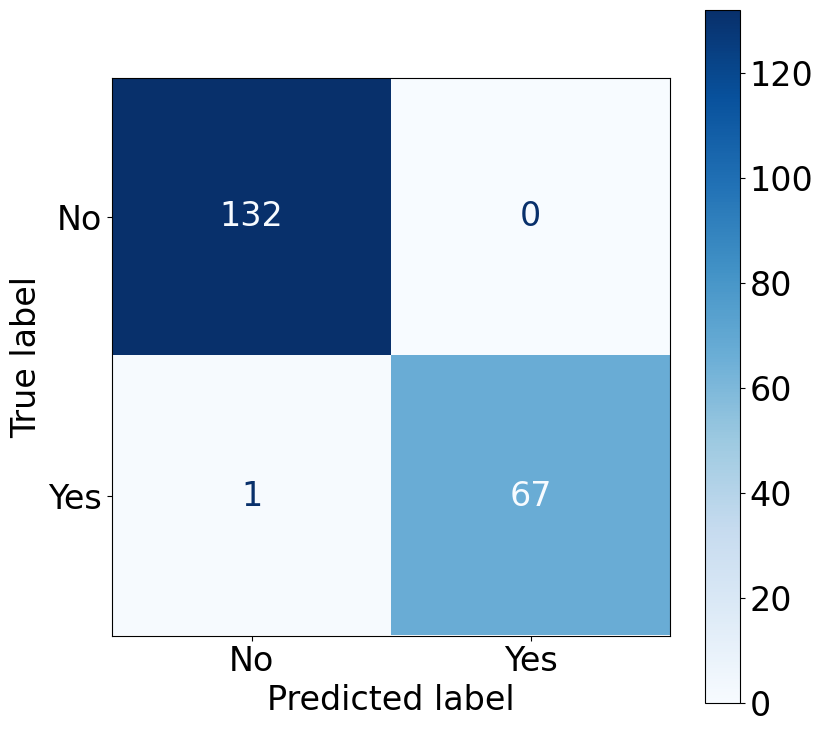

In [9]:
fig, ax = plt.subplots(figsize = (9,9))
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                          display_labels=('No', 'Yes'), ax=ax, cmap = 'Blues')

### 3.2 Plot the decision tree

Fill in the blanks. Draw the decision tree.

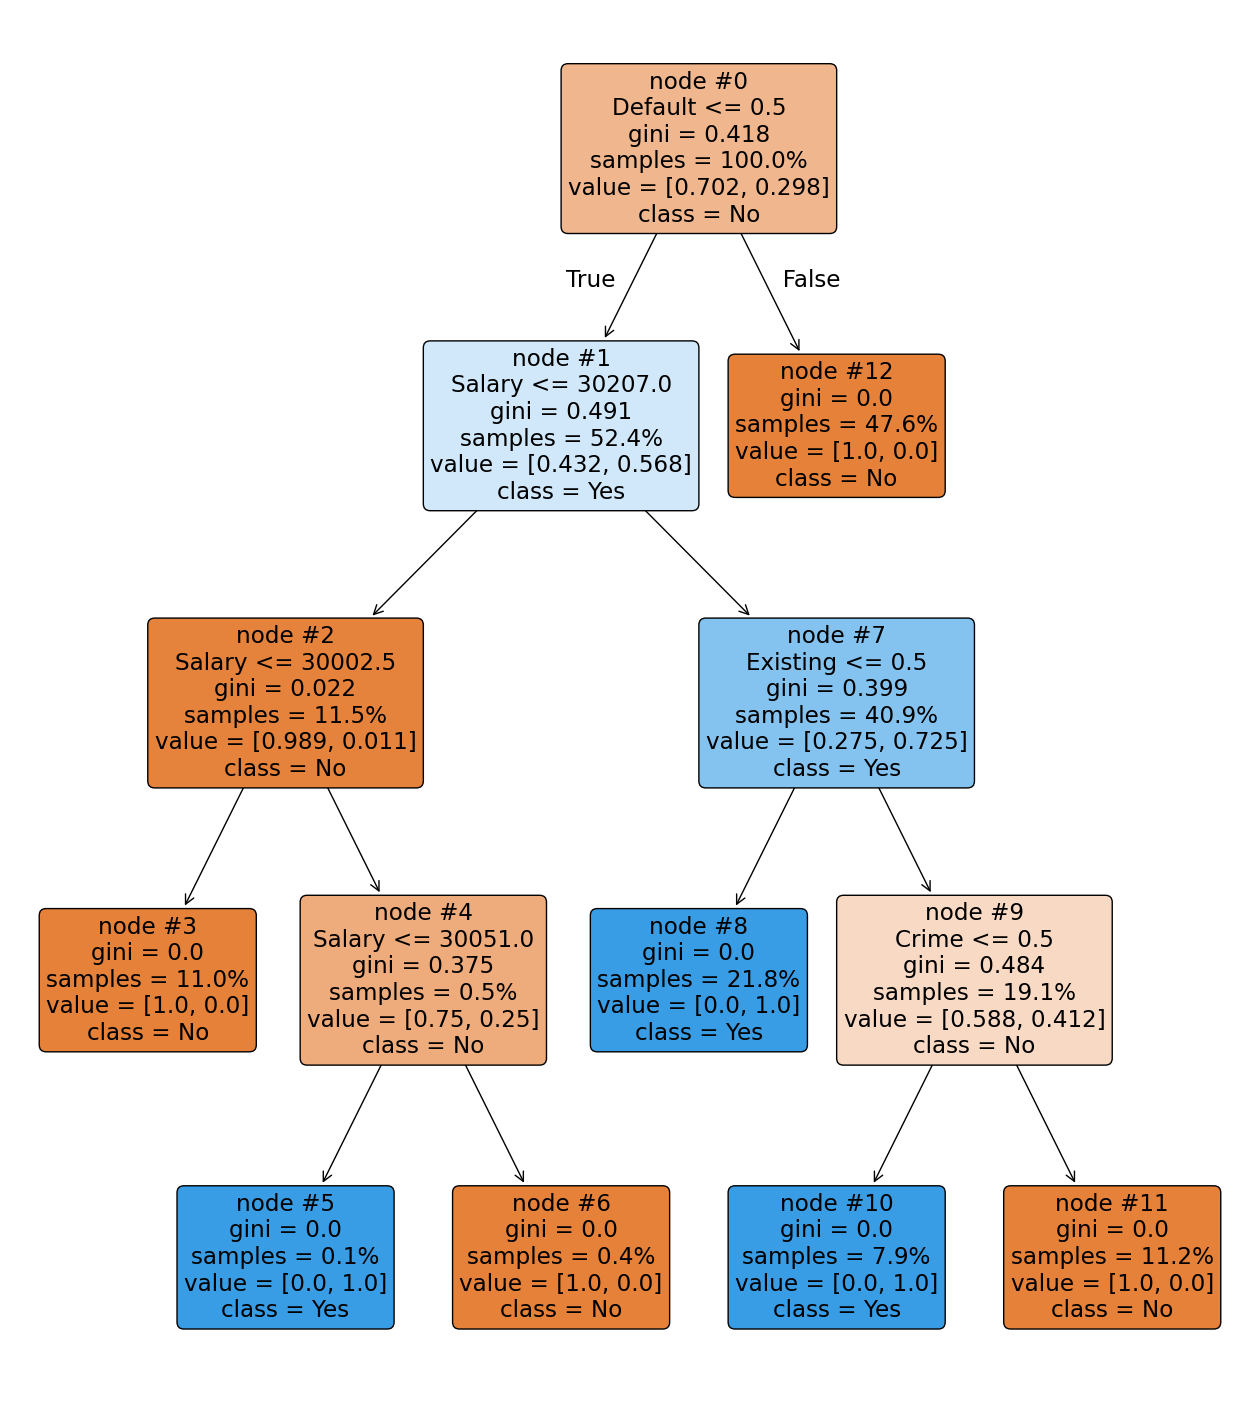

In [12]:
fig, ax = plt.subplots(figsize = (16, 18))
_ = tree.plot_tree(clf,feature_names=['Salary', 'Crime', 'Existing', 'Default'],
               class_names=['No','Yes'],filled=True,ax=ax, proportion=True,
               node_ids=True, rounded = True)

### 3.2 Plot the ROC curve

Fill in the blanks. Draw the ROC curve.

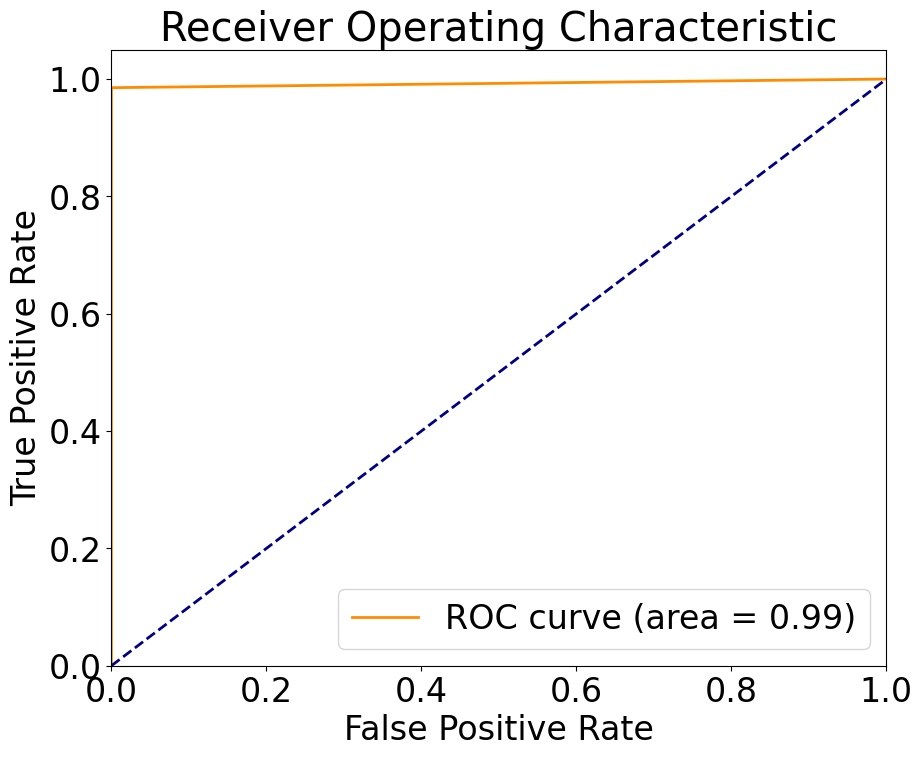

In [13]:
# Calculate FPR and TPR
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
